In [2]:
import pandas as pd

covid_data = pd.read_csv('data/covid_data.csv')
covid_data['date'] = pd.to_datetime(covid_data['date'])
display(covid_data.head())

,date,province/state,country,confirmed,deaths,recovered
0,2020-01-22,Anhui,China,1.0,0.0,0.0
1,2020-01-22,Beijing,China,14.0,0.0,0.0
2,2020-01-22,Chongqing,China,6.0,0.0,0.0
3,2020-01-22,Fujian,China,1.0,0.0,0.0
4,2020-01-22,Gansu,China,0.0,0.0,0.0


In [3]:
vaccinations_data = pd.read_csv('data/country_vaccinations.csv')
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']
]
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])
display(vaccinations_data.head())

,country,date,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,Afghanistan,2021-02-22,0.0,0.0,0.0,NaN,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
3,Afghanistan,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
4,Afghanistan,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."


1. Группируем таблицу по дате и названию страны и рассчитываем суммарные показатели по всем регионам. Тем самым переходим от данных по регионам к данным по странам:

In [4]:
covid_data = covid_data.groupby(
    ['date', 'country'], 
    as_index=False
)[['confirmed', 'deaths', 'recovered']].sum()
display(covid_data)

,date,country,confirmed,deaths,recovered
0,2020-01-22,China,547.0,17.0,28.0
1,2020-01-22,Hong Kong,0.0,0.0,0.0
2,2020-01-22,Japan,2.0,0.0,0.0
3,2020-01-22,Kiribati,0.0,0.0,0.0
4,2020-01-22,Macau,1.0,0.0,0.0
...,...,...,...,...,...
86780,2021-05-29,Vietnam,6908.0,47.0,2896.0
86781,2021-05-29,West Bank and Gaza,307838.0,3492.0,300524.0
86782,2021-05-29,Yemen,6731.0,1319.0,3399.0
86783,2021-05-29,Zambia,94751.0,1276.0,91594.0


2. Преобразуем даты в формат datetime с помощью функции pd.to_datetime():

In [5]:
covid_data['date'] = pd.to_datetime(covid_data['date'])

3. Создадим признак больных на данный момент (active). Для этого вычтем из общего числа зафиксированных случаев число смертей и число выздоровевших пациентов:

In [6]:
covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered']

4. Создадим признак ежедневного прироста числа заболевших, умерших и выздоровевших людей. Для этого отсортируем данные по названиям стран, а затем по датам. После этого произведём группировку по странам и рассчитаем разницу между «вчера и сегодня» с помощью метода diff():

In [7]:
covid_data = covid_data.sort_values(by=['country', 'date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()
display(covid_data)

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered
881,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN
920,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
963,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1013,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1067,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2373,2020-03-12,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2647,2020-03-14,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2796,2020-03-15,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2954,2020-03-16,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
print(str(covid_data['date'].dt.date.min()) + '-' + str(covid_data['date'].dt.date.max()))

2020-01-22-2021-05-29


In [9]:
print(str(vaccinations_data['date'].dt.date.min()) + '-' + str(vaccinations_data['date'].dt.date.max()))

2020-12-02-2021-09-06


In [10]:
mask1 = covid_data['date'] >= '2020-01-22'
mask2 = covid_data['date'] <= '2021-09-06'
covid_df = covid_data[mask1&mask2].merge(vaccinations_data, how='left', on=['date','country'])
#covid_df = covid_df.drop_duplicates()
display(covid_df)

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86780,2020-03-12,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86781,2020-03-14,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86782,2020-03-15,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86783,2020-03-16,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
covid_df['death_rate'] = covid_df['deaths'] / covid_df['confirmed'] * 100
covid_df['recover_rate'] = covid_df['recovered'] / covid_df['confirmed'] * 100
print(covid_df)

            date                         country  confirmed  deaths  \
0     2020-02-24                     Afghanistan        1.0     0.0   
1     2020-02-25                     Afghanistan        1.0     0.0   
2     2020-02-26                     Afghanistan        1.0     0.0   
3     2020-02-27                     Afghanistan        1.0     0.0   
4     2020-02-28                     Afghanistan        1.0     0.0   
...          ...                             ...        ...     ...   
86780 2020-03-12  occupied Palestinian territory        0.0     0.0   
86781 2020-03-14  occupied Palestinian territory        0.0     0.0   
86782 2020-03-15  occupied Palestinian territory        0.0     0.0   
86783 2020-03-16  occupied Palestinian territory        0.0     0.0   
86784 2020-03-17  occupied Palestinian territory        0.0     0.0   

       recovered  active  daily_confirmed  daily_deaths  daily_recovered  \
0            0.0     1.0              NaN           NaN              Na

In [12]:
mask_country = covid_df['country'] =='United States'
print(round(covid_df[mask_country]['death_rate'].max(), ndigits=2))

7.19


In [13]:
mask_country = covid_df['country'] =='Russia'
print(round(covid_df[mask_country]['recover_rate'].mean(), ndigits=2))

67.06


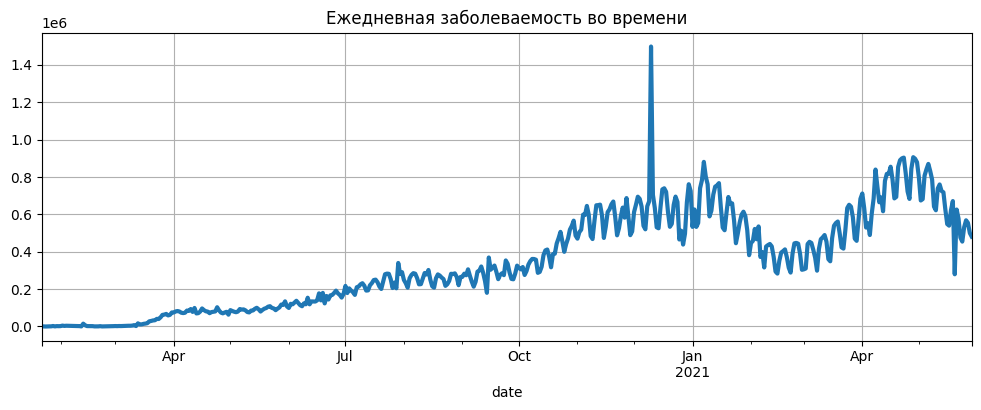

In [18]:
grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()
grouped_cases.plot(
    kind='line',
    figsize=(12, 4),
    title='Ежедневная заболеваемость во времени',
    grid = True,
    lw=3
);

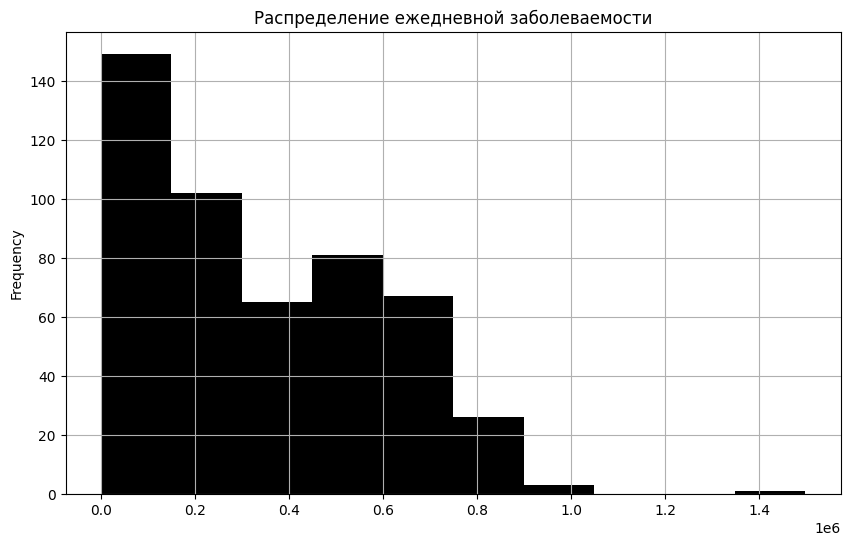

In [25]:
grouped_cases.plot(
    kind='hist',
    figsize=(10, 6),
    title='Распределение ежедневной заболеваемости',
    grid = True,
    color = 'black',
    bins=10
);

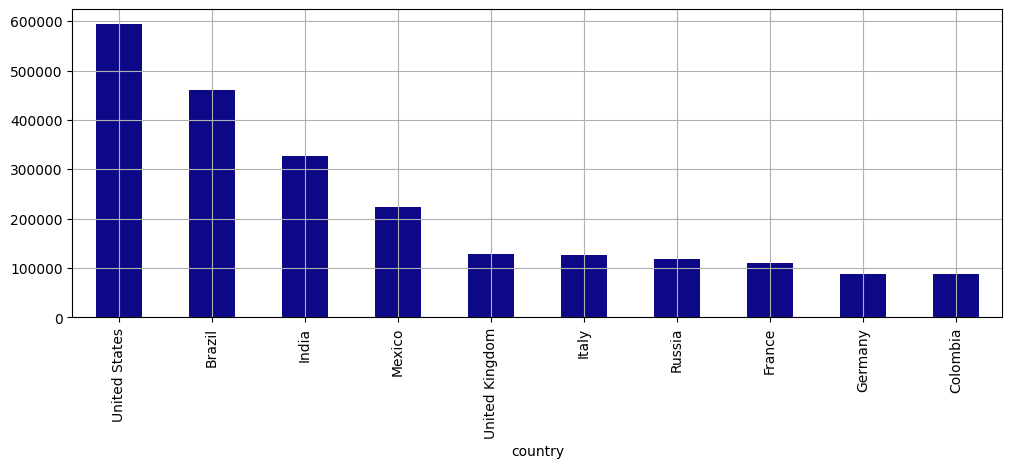

In [27]:
grouped_country = covid_df.groupby(['country'])['deaths'].last()
grouped_country = grouped_country.nlargest(10)
grouped_country.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap='plasma'
);

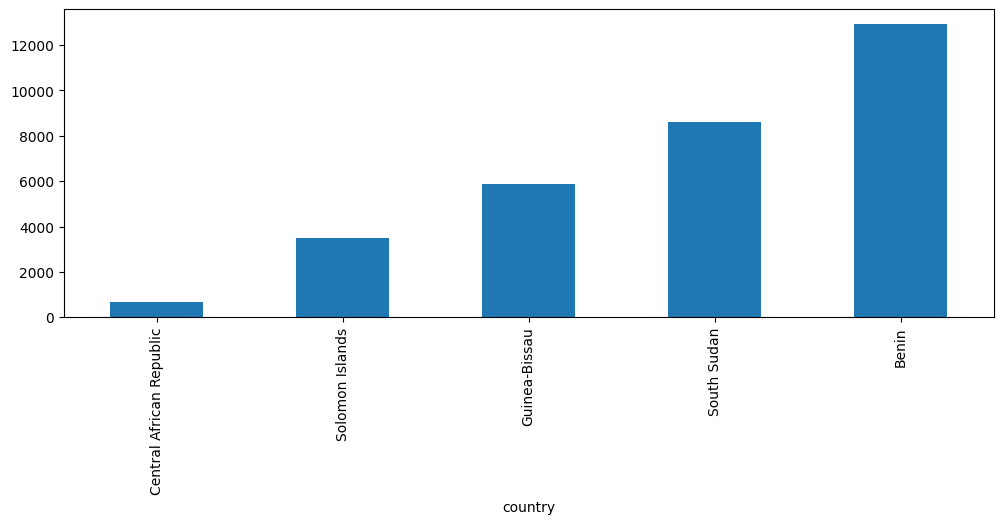

In [30]:
covid_df.groupby(['country'])['total_vaccinations'].last().nsmallest(5).plot(kind='bar', figsize=(12, 4));